# Macys HVAC - exploratory data analysis

**Contents**
- [Load data and import necessary libraries](#Load-data-and-import-necessary-libraries)
- [Histograms](#Histograms)
- [Daily statistics](#Daily-statistics)
- [Time compressors are on](#Time-compressors-are-on)
- [Random Forest classifier](#Random-Forest-classifier)
- [Efficiency variables: EER, COP and kW/Ton](#Efficiency-variables:-EER,-COP-and-kW/Ton)
- [Energy consumption variable: kw](#Energy-consumption-variable:-kw)

### Load data and import necessary libraries

In [21]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
# load october data
Oct = pd.read_csv('Macys\\macys10-01to10-31-2019-1s.csv')

# format date column
Oct['date'] = pd.to_datetime(Oct.time)
Oct.set_index('date', inplace=True) 

# add 'number of compressors' column
Oct['n_compressors'] = Oct['compressor1']+Oct['compressor2']+Oct['compressor3']+Oct['compressor4']

# display first 5 rows of data
Oct.head()

,name,tags,time,velocity,cfm,compressor1,compressor2,compressor3,compressor4,COP,...,humidity1,temp1,enthalpy1,humidity2,temp2,enthalpy2,totalCapacity_BTU,wetbulb1,wetbulb2,n_compressors
date,,,,,,,,,,,,,,,,,,,,,
2019-10-01 05:00:02,366,NaN,1569906002000000000,-448,0,0,0,0,0,0.0,...,56,84,0.0,81,78,0.0,0.0,0.0,0.0,0
2019-10-01 05:00:03,366,NaN,1569906003000000000,-448,0,0,0,0,0,0.0,...,56,84,0.0,81,78,0.0,0.0,0.0,0.0,0
2019-10-01 05:00:04,366,NaN,1569906004000000000,-448,0,0,0,0,0,0.0,...,56,84,0.0,81,78,0.0,0.0,0.0,0.0,0
2019-10-01 05:00:06,366,NaN,1569906006000000000,-448,0,0,0,0,0,0.0,...,56,84,0.0,81,78,0.0,0.0,0.0,0.0,0
2019-10-01 05:00:07,366,NaN,1569906007000000000,-448,0,0,0,0,0,0.0,...,56,84,0.0,81,78,0.0,0.0,0.0,0.0,0


In [4]:
# load May data
May = pd.read_csv('Macys\\macys05-01to05-31-2020-1s.csv')

# format date column
May['date'] = pd.to_datetime(May.time)
May.set_index('date', inplace=True) 

# add 'number of compressors' column
May['n_compressors'] = May['compressor1']+May['compressor2']+May['compressor3']+May['compressor4']

# display first 5 rows of data
May.head()

,name,tags,time,velocity,cfm,compressor1,compressor2,compressor3,compressor4,COP,...,humidity1,temp1,enthalpy1,humidity2,temp2,enthalpy2,totalCapacity_BTU,wetbulb1,wetbulb2,n_compressors
date,,,,,,,,,,,,,,,,,,,,,
2020-05-01 05:00:00,366,NaN,1588309200000000000,0,0,0,0,0,0,0.0,...,40,76,0.0,35,79,0.0,0.0,0.0,0.0,0
2020-05-01 05:00:02,366,NaN,1588309202000000000,0,0,0,0,0,0,0.0,...,40,76,0.0,35,79,0.0,0.0,0.0,0.0,0
2020-05-01 05:00:03,366,NaN,1588309203000000000,0,0,0,0,0,0,0.0,...,40,76,0.0,35,79,0.0,0.0,0.0,0.0,0
2020-05-01 05:00:04,366,NaN,1588309204000000000,0,0,0,0,0,0,0.0,...,40,76,0.0,35,79,0.0,0.0,0.0,0.0,0
2020-05-01 05:00:05,366,NaN,1588309205000000000,0,0,0,0,0,0,0.0,...,40,76,0.0,35,79,0.0,0.0,0.0,0.0,0


## Histograms

Macy’s HVAC unit was treated with the proper type and amount of PermaFrost NMR® on November 1, 2019. To better understand the effect of the treatment, we computed monthly histograms of the following variables:
- kw (kilowatts; measure of energy consumption),
- kW/Ton (kilowatts per ton; measure of energy efficiency),
- EER (energy efficiency ratio),
- COP (coefficient of performance), and
- ton (capacity).

The variables kw, kW/Ton, EER, COP and ton were chosen because of their independence on external conditions (temperature and humidity).


Below, we show the results for the months of May-2020 (post-treatment) and October-2019 (pre-treatment). The histograms are colored according to the number of compressors.

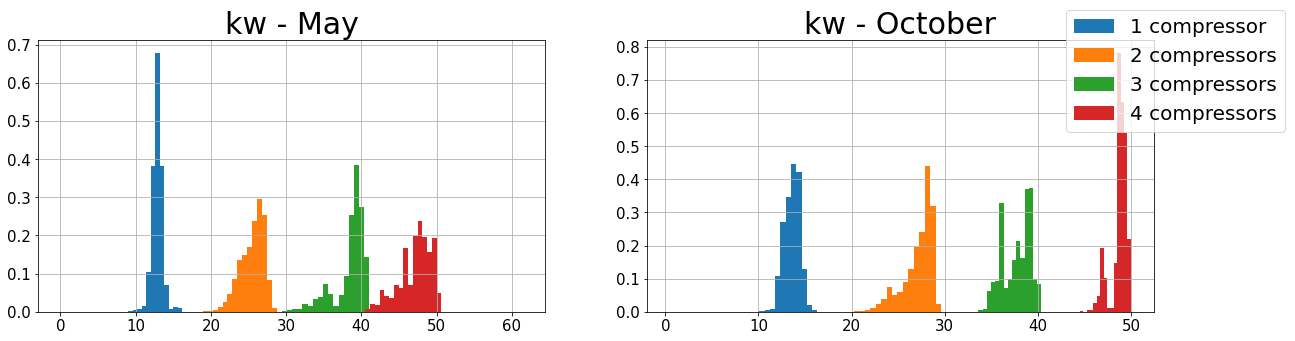

In [5]:
# kw histograms

fig, ax = plt.subplots(nrows=1,ncols=2, figsize=(20,5))


May[May.n_compressors==1].kw.hist(ax=ax[0],bins=50, label='1 compressor', density=True)
May[May.n_compressors==2].kw.hist(ax=ax[0],bins=50, label='2 compressors', density=True)
May[May.n_compressors==3].kw.hist(ax=ax[0],bins=50, label='3 compressors', density=True)
May[May.n_compressors==4].kw.hist(ax=ax[0],bins=50, label='4 compressors', density=True)
ax[0].set_title('kw - May', fontsize=30)
ax[0].tick_params(axis='x', labelsize=15)
ax[0].tick_params(axis='y', labelsize=15)

Oct[Oct.n_compressors==1].kw.hist(ax=ax[1],bins=50, density=True)
Oct[Oct.n_compressors==2].kw.hist(ax=ax[1],bins=50, density=True)
Oct[Oct.n_compressors==3].kw.hist(ax=ax[1],bins=50, density=True)
Oct[Oct.n_compressors==4].kw.hist(ax=ax[1],bins=50,  density=True)
fig.legend(fontsize=20)
ax[1].set_title('kw - October', fontsize=30)
ax[1].tick_params(axis='x', labelsize=15)
ax[1].tick_params(axis='y', labelsize=15)

plt.show()

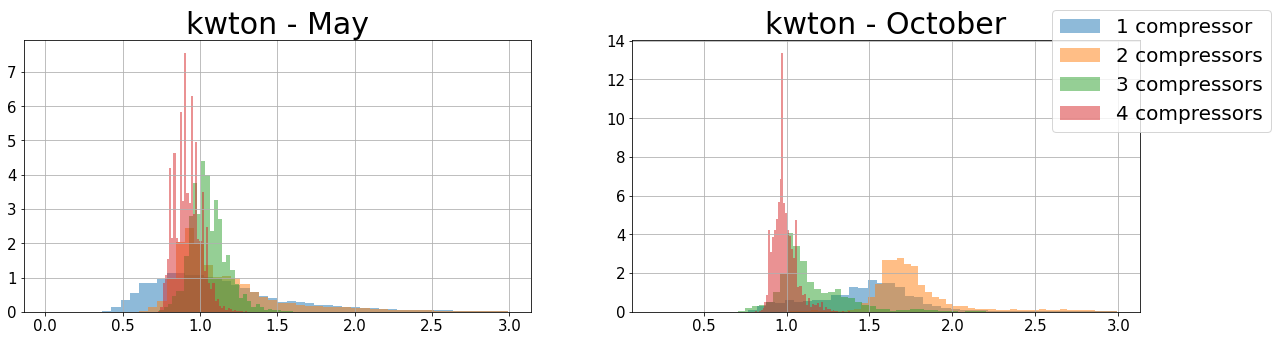

In [6]:
# kwton histograms
fig, ax = plt.subplots(nrows=1,ncols=2, figsize=(20,5))


May[(May.n_compressors==1) & (May.kwton<3) & (May.kwton>0)].kwton.hist(ax=ax[0],bins=50, label='1 compressor', alpha=0.5, density=True)
May[(May.n_compressors==2) & (May.kwton<3) & (May.kwton>0)].kwton.hist(ax=ax[0],bins=50, label='2 compressors', alpha=0.5, density=True)
May[(May.n_compressors==3) & (May.kwton<3) & (May.kwton>0)].kwton.hist(ax=ax[0],bins=50, label='3 compressors', alpha=0.5, density=True)
May[(May.n_compressors==4) & (May.kwton<3) & (May.kwton>0)].kwton.hist(ax=ax[0],bins=50, label='4 compressors', alpha=0.5, density=True)
ax[0].set_title('kwton - May', fontsize=30)
ax[0].tick_params(axis='x', labelsize=15)
ax[0].tick_params(axis='y', labelsize=15)

Oct[(Oct.n_compressors==1) & (Oct.kwton<3) & (Oct.kwton>0)].kwton.hist(ax=ax[1],bins=50, alpha=0.5, density=True)
Oct[(Oct.n_compressors==2) & (Oct.kwton<3) & (Oct.kwton>0)].kwton.hist(ax=ax[1],bins=50, alpha=0.5, density=True)
Oct[(Oct.n_compressors==3) & (Oct.kwton<3) & (Oct.kwton>0)].kwton.hist(ax=ax[1],bins=50, alpha=0.5, density=True)
Oct[(Oct.n_compressors==4) & (Oct.kwton<3) & (Oct.kwton>0)].kwton.hist(ax=ax[1],bins=50, alpha=0.5, density=True)
fig.legend(fontsize=20)
ax[1].set_title('kwton - October', fontsize=30)
ax[1].tick_params(axis='x', labelsize=15)
ax[1].tick_params(axis='y', labelsize=15)

plt.show()

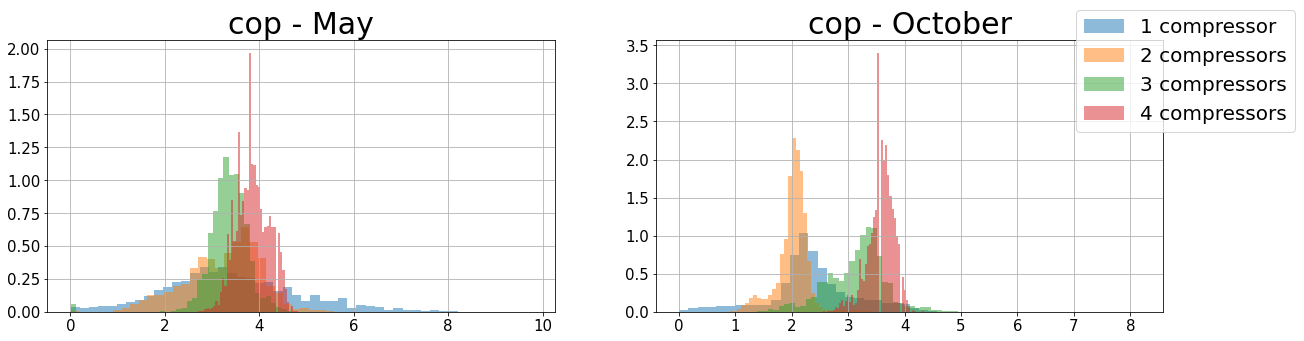

In [7]:
# COP histograms
fig, ax = plt.subplots(nrows=1,ncols=2, figsize=(20,5))


May[(May.n_compressors==1) & (May.COP<10) & (May.COP>0)].COP.hist(ax=ax[0],bins=50, label='1 compressor', alpha=0.5, density=True)
May[(May.n_compressors==2) & (May.COP<10) & (May.COP>0)].COP.hist(ax=ax[0],bins=50, label='2 compressors', alpha=0.5, density=True)
May[(May.n_compressors==3) & (May.COP<10) & (May.COP>0)].COP.hist(ax=ax[0],bins=50, label='3 compressors', alpha=0.5, density=True)
May[(May.n_compressors==4) & (May.COP<10) & (May.COP>0)].COP.hist(ax=ax[0],bins=50, label='4 compressors', alpha=0.5, density=True)
ax[0].set_title('cop - May', fontsize=30)
ax[0].tick_params(axis='x', labelsize=15)
ax[0].tick_params(axis='y', labelsize=15)

Oct[(Oct.n_compressors==1) & (Oct.COP<10) & (Oct.COP>0)].COP.hist(ax=ax[1],bins=50, alpha=0.5, density=True)
Oct[(Oct.n_compressors==2) & (Oct.COP<10) & (Oct.COP>0)].COP.hist(ax=ax[1],bins=50, alpha=0.5, density=True)
Oct[(Oct.n_compressors==3) & (Oct.COP<10) & (Oct.COP>0)].COP.hist(ax=ax[1],bins=50, alpha=0.5, density=True)
Oct[(Oct.n_compressors==4) & (Oct.COP<10) & (Oct.COP>0)].COP.hist(ax=ax[1],bins=50, alpha=0.5, density=True)
fig.legend(fontsize=20)
ax[1].set_title('cop - October', fontsize=30)
ax[1].tick_params(axis='x', labelsize=15)
ax[1].tick_params(axis='y', labelsize=15)

plt.show()

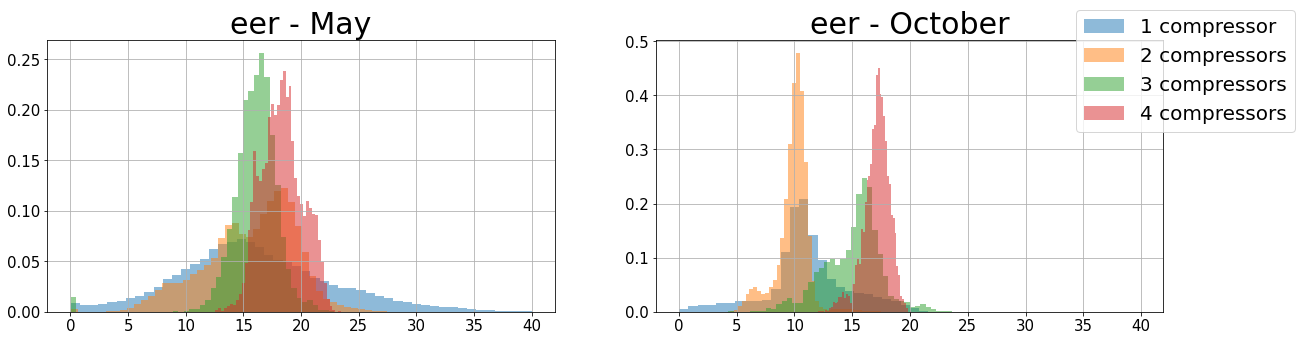

In [8]:
# eer histograms
fig, ax = plt.subplots(nrows=1,ncols=2, figsize=(20,5))


May[(May.n_compressors==1) & (May.eer<40) & (May.eer>0)].eer.hist(ax=ax[0],bins=50, label='1 compressor', alpha=0.5, density=True)
May[(May.n_compressors==2) & (May.eer<40) & (May.eer>0)].eer.hist(ax=ax[0],bins=50, label='2 compressors', alpha=0.5, density=True)
May[(May.n_compressors==3) & (May.eer<40) & (May.eer>0)].eer.hist(ax=ax[0],bins=50, label='3 compressors', alpha=0.5, density=True)
May[(May.n_compressors==4) & (May.eer<40) & (May.eer>0)].eer.hist(ax=ax[0],bins=50, label='4 compressors', alpha=0.5, density=True)
ax[0].set_title('eer - May', fontsize=30)
ax[0].tick_params(axis='x', labelsize=15)
ax[0].tick_params(axis='y', labelsize=15)

Oct[(Oct.n_compressors==1) & (Oct.eer<40) & (Oct.eer>0)].eer.hist(ax=ax[1],bins=50,  alpha=0.5, density=True)
Oct[(Oct.n_compressors==2) & (Oct.eer<40) & (Oct.eer>0)].eer.hist(ax=ax[1],bins=50,  alpha=0.5, density=True)
Oct[(Oct.n_compressors==3) & (Oct.eer<40) & (Oct.eer>0)].eer.hist(ax=ax[1],bins=50,  alpha=0.5, density=True)
Oct[(Oct.n_compressors==4) & (Oct.eer<40) & (Oct.eer>0)].eer.hist(ax=ax[1],bins=50,  alpha=0.5, density=True)
fig.legend(fontsize=20)
ax[1].set_title('eer - October', fontsize=30)
ax[1].tick_params(axis='x', labelsize=15)
ax[1].tick_params(axis='y', labelsize=15)

plt.show()

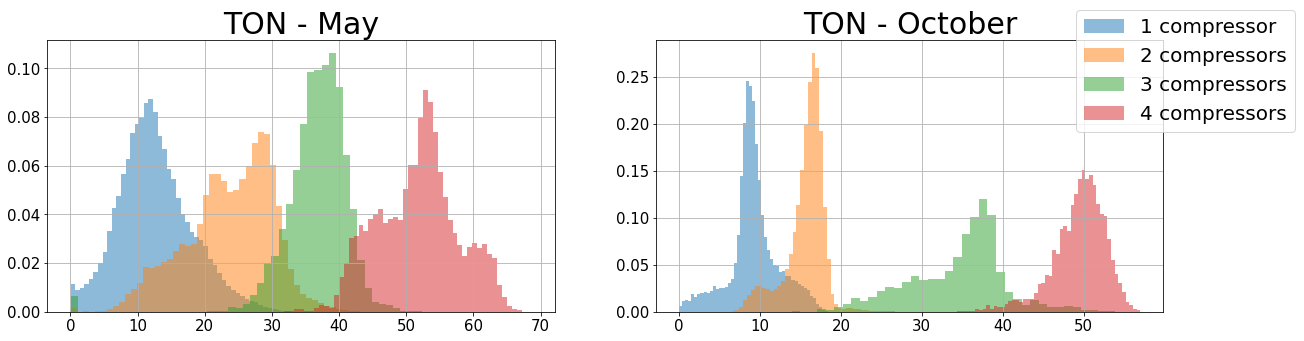

In [9]:
# total capacity
fig, ax = plt.subplots(nrows=1,ncols=2, figsize=(20,5))


May[(May.n_compressors==1) & (May.totalCapacity_TONS<80) & (May.totalCapacity_TONS>0)].totalCapacity_TONS.hist(ax=ax[0],bins=50, label='1 compressor', alpha=0.5, density=True)
May[(May.n_compressors==2) & (May.totalCapacity_TONS<80) & (May.totalCapacity_TONS>0)].totalCapacity_TONS.hist(ax=ax[0],bins=50, label='2 compressors', alpha=0.5, density=True)
May[(May.n_compressors==3) & (May.totalCapacity_TONS<80) & (May.totalCapacity_TONS>0)].totalCapacity_TONS.hist(ax=ax[0],bins=50, label='3 compressors', alpha=0.5, density=True)
May[(May.n_compressors==4) & (May.totalCapacity_TONS<80) & (May.totalCapacity_TONS>0)].totalCapacity_TONS.hist(ax=ax[0],bins=50, label='4 compressors', alpha=0.5, density=True)
ax[0].set_title('TON - May', fontsize=30)
ax[0].tick_params(axis='x', labelsize=15)
ax[0].tick_params(axis='y', labelsize=15)

Oct[(Oct.n_compressors==1) & (Oct.totalCapacity_TONS<80) & (Oct.totalCapacity_TONS>0)].totalCapacity_TONS.hist(ax=ax[1],bins=50, alpha=0.5, density=True)
Oct[(Oct.n_compressors==2) & (Oct.totalCapacity_TONS<80) & (Oct.totalCapacity_TONS>0)].totalCapacity_TONS.hist(ax=ax[1],bins=50, alpha=0.5, density=True)
Oct[(Oct.n_compressors==3) & (Oct.totalCapacity_TONS<80) & (Oct.totalCapacity_TONS>0)].totalCapacity_TONS.hist(ax=ax[1],bins=50, alpha=0.5, density=True)
Oct[(Oct.n_compressors==4) & (Oct.totalCapacity_TONS<80) & (Oct.totalCapacity_TONS>0)].totalCapacity_TONS.hist(ax=ax[1],bins=50, alpha=0.5, density=True)
fig.legend(fontsize=20)
ax[1].set_title('TON - October', fontsize=30)
ax[1].tick_params(axis='x', labelsize=15)
ax[1].tick_params(axis='y', labelsize=15)

plt.show()

Here, we summarize the effect of the treatment on the HVAC unit:
- the unit is more efficient (smaller kW/Ton, higher COP and EER)
- the unit has more capacity (higher TON)
- about the same energy consumption (before and after the treatment)

the biggest difference was when 1 or 2 compressors were on (this is because the treatment hasn't taken effect yet).

Based on the chosen variables, there is a clear distinction between pre- and post-treatment days. This opens the possibility of training Supervised Machine Learning models that automatically distinguish before post-treatment days (correct functioning of the HVAC unit) and pre-treatment days (anomalus functioning of the HVAC unit). Preliminary results in this direction are reported [here](#Random-Forest-Classifier)


## Daily statistics

To further study the difference between May and October data, we compute some daily summary statistics:
- **median (med)** kwton, cop, eer,
- **median absolute deviation (mad)** kwton, cop, eer,
- **average** and **max** outside temperature,
- **median** and **median absolute deviation** capacity (TON) (with 1, 2, 3 or 4 compressors), and
- **% time** compressors are on.

**Note:** averages (mean) and standard deviations (std) are too sensitive to outliers (peaks).
This is why we are using median instead of mean, and mad instead of std.

Pandas does not have a mean absolute deviation function. We'll have to write our own:

In [10]:
# median absolute deviation function
def median_abs_deviation(group):
    return np.abs(group-group.median()).median()

In [24]:
# Summary statistics - May data

daily_May = pd.DataFrame()

# medians: kwton, cop, and eer
daily_May ['kwton_med']= May[May.n_compressors>0].kwton.resample('d').median()
daily_May['cop_med'] = May[May.n_compressors>0].COP.resample('d').median()
daily_May['eer_med'] = May[May.n_compressors>0].eer.resample('d').median()

# median absolute deviation: kwton, cop, and eer
daily_May['kwton_mad'] = May[May.n_compressors>0].kwton.resample('d').apply(median_abs_deviation)
daily_May['cop_mad'] = May[May.n_compressors>0].COP.resample('d').apply(median_abs_deviation)
daily_May['eer_mad'] = May[May.n_compressors>0].eer.resample('d').apply(median_abs_deviation)

# capacity - 1 compressor
daily_May['ton_1_compressor_med'] = May[May.n_compressors==1].totalCapacity_TONS.resample('d').median()
daily_May['ton_1_compressor_mad'] = May[May.n_compressors==1].totalCapacity_TONS.resample('d').apply(median_abs_deviation)

# capacity - 2 compressors
daily_May['ton_2_compressors_med'] = May[May.n_compressors==2].totalCapacity_TONS.resample('d').median()
daily_May['ton_2_compressors_mad'] = May[May.n_compressors==2].totalCapacity_TONS.resample('d').apply(median_abs_deviation)

# capacity - 3 compressors
daily_May['ton_3_compressors_med'] = May[May.n_compressors==3].totalCapacity_TONS.resample('d').median()
daily_May['ton_3_compressors_mad'] = May[May.n_compressors==3].totalCapacity_TONS.resample('d').apply(median_abs_deviation)

# capacity - 4 compressors
daily_May['ton_4_compressors_med'] = May[May.n_compressors==4].totalCapacity_TONS.resample('d').median()
daily_May['ton_4_compressors_mad'] = May[May.n_compressors==4].totalCapacity_TONS.resample('d').apply(median_abs_deviation)

# max and average temperature
daily_May['avg_temp'] = May.OAtemp.resample('d').mean()
daily_May['max_temp'] = May.OAtemp.resample('d').max()

# time compressors on
daily_May['time_1'] = May.compressor1.resample('d').sum()/May.compressor1.resample('d').size()
daily_May['time_2'] = May.compressor2.resample('d').sum()/May.compressor1.resample('d').size()
daily_May['time_3'] = May.compressor3.resample('d').sum()/May.compressor1.resample('d').size()
daily_May['time_4'] = May.compressor4.resample('d').sum()/May.compressor1.resample('d').size()

# normal or anomaly
daily_May['status'] = 'post-treatment' 

daily_May.head()

,kwton_med,cop_med,eer_med,kwton_mad,cop_mad,eer_mad,ton_1_compressor_med,ton_1_compressor_mad,ton_2_compressors_med,ton_2_compressors_mad,...,ton_3_compressors_mad,ton_4_compressors_med,ton_4_compressors_mad,avg_temp,max_temp,time_1,time_2,time_3,time_4,status
date,,,,,,,,,,,,,,,,,,,,,
2020-05-01,1.26,2.791269,13.229239,0.23,0.536782,2.529463,10.900,2.040,16.195,1.815,...,NaN,NaN,NaN,77.996381,96.62,0.184905,0.007150,0.000000,0.000000,post-treatment
2020-05-02,1.31,2.425516,11.244024,0.34,0.855428,4.040999,8.830,3.260,NaN,NaN,...,NaN,NaN,NaN,78.307410,94.46,0.067111,0.000000,0.000000,0.000000,post-treatment
2020-05-03,0.85,4.137646,19.635777,0.12,0.551686,2.451698,18.000,1.670,27.010,1.700,...,1.825,52.035,1.505,83.093713,99.68,0.306938,0.137512,0.029346,0.022254,post-treatment
2020-05-04,0.98,3.588774,17.502511,0.08,0.301860,1.489190,15.455,6.045,28.200,1.610,...,1.600,52.960,1.990,84.759048,100.22,0.363056,0.322510,0.117289,0.029311,post-treatment
2020-05-05,1.63,2.131514,9.959093,0.30,0.417035,1.874775,8.010,1.390,11.800,2.210,...,NaN,NaN,NaN,75.893102,93.20,0.309969,0.057505,0.000000,0.000000,post-treatment


In [23]:
# Summary statistics - October data
daily_Oct = pd.DataFrame()

# averages-medians
daily_Oct['kwton_med'] = Oct[Oct.n_compressors>0].kwton.resample('d').median()
daily_Oct['cop_med'] = Oct[Oct.n_compressors>0].COP.resample('d').median()
daily_Oct['eer_med'] = Oct[Oct.n_compressors>0].eer.resample('d').median()

# median absolute deviation
daily_Oct['kwton_mad'] = Oct[Oct.n_compressors>0].kwton.resample('d').apply(median_abs_deviation)
daily_Oct['cop_mad'] = Oct[Oct.n_compressors>0].COP.resample('d').apply(median_abs_deviation)
daily_Oct['eer_mad'] = Oct[Oct.n_compressors>0].eer.resample('d').apply(median_abs_deviation)

# capacity - 1 compressor
daily_Oct['ton_1_compressor_med'] = Oct[Oct.n_compressors==1].totalCapacity_TONS.resample('d').median()
daily_Oct['ton_1_compressor_mad'] = Oct[Oct.n_compressors==1].totalCapacity_TONS.resample('d').apply(median_abs_deviation)

# capacity - 2 compressors
daily_Oct['ton_2_compressors_med'] = Oct[Oct.n_compressors==2].totalCapacity_TONS.resample('d').median()
daily_Oct['ton_2_compressors_mad'] = Oct[Oct.n_compressors==2].totalCapacity_TONS.resample('d').apply(median_abs_deviation)

# capacity - 3 compressors
daily_Oct['ton_3_compressors_med'] = Oct[Oct.n_compressors==3].totalCapacity_TONS.resample('d').median()
daily_Oct['ton_3_compressors_mad'] = Oct[Oct.n_compressors==3].totalCapacity_TONS.resample('d').apply(median_abs_deviation)

# capacity - 4 compressors
daily_Oct['ton_4_compressors_med'] = Oct[Oct.n_compressors==4].totalCapacity_TONS.resample('d').median()
daily_Oct['ton_4_compressors_mad'] = Oct[Oct.n_compressors==4].totalCapacity_TONS.resample('d').apply(median_abs_deviation)

# max and average temperature
daily_Oct['avg_temp'] = Oct.OAtemp.resample('d').mean()
daily_Oct['max_temp'] = Oct.OAtemp.resample('d').max()

# time compressors on
daily_Oct['time_1'] = Oct.compressor1.resample('d').sum()/Oct.compressor1.resample('d').size()
daily_Oct['time_2'] = Oct.compressor2.resample('d').sum()/Oct.compressor1.resample('d').size()
daily_Oct['time_3'] = Oct.compressor3.resample('d').sum()/Oct.compressor1.resample('d').size()
daily_Oct['time_4'] = Oct.compressor4.resample('d').sum()/Oct.compressor1.resample('d').size()

# normal or anomaly
daily_Oct['status'] = 'pre-treatment'

daily_Oct.head()

,kwton_med,cop_med,eer_med,kwton_mad,cop_mad,eer_mad,ton_1_compressor_med,ton_1_compressor_mad,ton_2_compressors_med,ton_2_compressors_mad,...,ton_3_compressors_mad,ton_4_compressors_med,ton_4_compressors_mad,avg_temp,max_temp,time_1,time_2,time_3,time_4,status
date,,,,,,,,,,,,,,,,,,,,,
2019-10-01,1.60,2.131514,10.401167,0.18,0.228887,1.010331,9.00,1.84,16.26,0.97,...,5.47,50.73,1.570,86.616812,98.78,0.587191,0.340788,0.045174,0.024142,pre-treatment
2019-10-02,1.62,2.118674,10.371123,0.16,0.186257,0.900704,8.82,1.74,16.43,0.95,...,5.97,50.28,1.475,86.757104,100.22,0.525896,0.317352,0.038199,0.019794,pre-treatment
2019-10-03,1.67,2.105987,10.305851,0.14,0.173570,0.818533,9.17,1.49,16.39,0.94,...,2.05,47.05,1.890,86.897438,101.30,0.496389,0.302692,0.029318,0.005299,pre-treatment
2019-10-04,1.57,2.170987,10.422542,0.16,0.205364,0.923174,9.18,1.01,16.06,1.10,...,0.00,NaN,NaN,80.990343,96.08,0.464428,0.235178,0.033601,0.000000,pre-treatment
2019-10-05,1.61,2.170987,10.573694,0.16,0.205364,0.900557,9.54,1.22,16.41,0.99,...,2.31,49.71,2.130,83.325501,100.40,0.497942,0.289816,0.033227,0.007419,pre-treatment


In [25]:
# merge Oct and May data
daily_data = pd.concat([daily_May,daily_Oct])
daily_data.fillna(0,inplace=True)
daily_data.head()

,kwton_med,cop_med,eer_med,kwton_mad,cop_mad,eer_mad,ton_1_compressor_med,ton_1_compressor_mad,ton_2_compressors_med,ton_2_compressors_mad,...,ton_3_compressors_mad,ton_4_compressors_med,ton_4_compressors_mad,avg_temp,max_temp,time_1,time_2,time_3,time_4,status
date,,,,,,,,,,,,,,,,,,,,,
2020-05-01,1.26,2.791269,13.229239,0.23,0.536782,2.529463,10.900,2.040,16.195,1.815,...,0.000,0.000,0.000,77.996381,96.62,0.184905,0.007150,0.000000,0.000000,post-treatment
2020-05-02,1.31,2.425516,11.244024,0.34,0.855428,4.040999,8.830,3.260,0.000,0.000,...,0.000,0.000,0.000,78.307410,94.46,0.067111,0.000000,0.000000,0.000000,post-treatment
2020-05-03,0.85,4.137646,19.635777,0.12,0.551686,2.451698,18.000,1.670,27.010,1.700,...,1.825,52.035,1.505,83.093713,99.68,0.306938,0.137512,0.029346,0.022254,post-treatment
2020-05-04,0.98,3.588774,17.502511,0.08,0.301860,1.489190,15.455,6.045,28.200,1.610,...,1.600,52.960,1.990,84.759048,100.22,0.363056,0.322510,0.117289,0.029311,post-treatment
2020-05-05,1.63,2.131514,9.959093,0.30,0.417035,1.874775,8.010,1.390,11.800,2.210,...,0.000,0.000,0.000,75.893102,93.20,0.309969,0.057505,0.000000,0.000000,post-treatment


In [26]:
daily_data.describe()

,kwton_med,cop_med,eer_med,kwton_mad,cop_mad,eer_mad,ton_1_compressor_med,ton_1_compressor_mad,ton_2_compressors_med,ton_2_compressors_mad,ton_3_compressors_med,ton_3_compressors_mad,ton_4_compressors_med,ton_4_compressors_mad,avg_temp,max_temp,time_1,time_2,time_3,time_4
count,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000
mean,1.241282,2.825568,13.499605,0.178974,0.381673,1.767293,11.769359,1.932821,18.538846,1.641667,19.805256,1.189487,22.701667,0.788333,77.332480,92.756923,0.331154,0.161138,0.025955,0.006805
std,0.383537,0.890821,4.304853,0.118695,0.166750,0.747787,4.426203,0.956590,8.515207,0.992229,17.794414,1.408488,25.092626,0.917853,6.182755,7.052457,0.124675,0.111512,0.038406,0.009684
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,63.791664,74.120000,0.000000,0.000000,0.000000,0.000000
25%,0.945000,2.151251,10.386145,0.100000,0.244748,1.179056,9.000000,1.390000,14.865000,1.070000,0.000000,0.000000,0.000000,0.000000,72.733277,87.890000,0.270063,0.069529,0.000000,0.000000
50%,1.250000,2.769290,13.229239,0.160000,0.386144,1.808616,10.480000,1.840000,18.560000,1.610000,31.190000,1.040000,0.000000,0.000000,78.257876,94.100000,0.335334,0.155657,0.012732,0.000000
75%,1.600000,3.607273,17.589600,0.220000,0.483827,2.181721,14.550000,2.070000,24.865000,1.865000,36.240000,1.845000,48.380000,1.765000,81.449448,98.960000,0.372719,0.253415,0.033414,0.009712
max,1.930000,4.237348,20.406201,0.610000,0.855428,4.040999,20.420000,6.045000,30.000000,5.470000,39.430000,5.970000,60.775000,2.420000,86.897438,102.380000,0.619740,0.340788,0.156881,0.029311


In [27]:
# there is a day will all features = 0
daily_data[daily_data.kwton_med<0.1]

,kwton_med,cop_med,eer_med,kwton_mad,cop_mad,eer_mad,ton_1_compressor_med,ton_1_compressor_mad,ton_2_compressors_med,ton_2_compressors_mad,...,ton_3_compressors_mad,ton_4_compressors_med,ton_4_compressors_mad,avg_temp,max_temp,time_1,time_2,time_3,time_4,status
date,,,,,,,,,,,,,,,,,,,,,
2019-10-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,79.810242,84.02,0.0,0.0,0.0,0.0,pre-treatment


In [28]:
# drop that day
daily_data.drop(daily_data[daily_data.kwton_med<0.1].index,axis=0, inplace=True)

**Box plots**

<AxesSubplot:xlabel='status', ylabel='kwton_mad'>

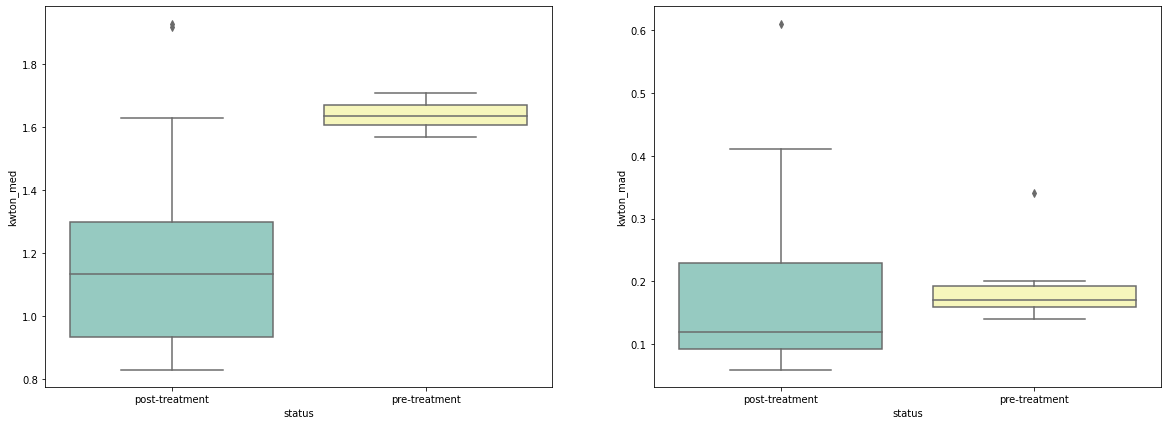

In [30]:
# kwton box plots

fig, ax = plt.subplots(1,2,figsize=(20,7))
sns.boxplot(x='status', 
            y='kwton_med', 
            data=daily_data, 
            palette="Set3",
            ax=ax[0])

sns.boxplot(x='status', 
            y='kwton_mad', 
            data=daily_data, 
            palette="Set3",
            ax=ax[1])

<AxesSubplot:xlabel='status', ylabel='cop_mad'>

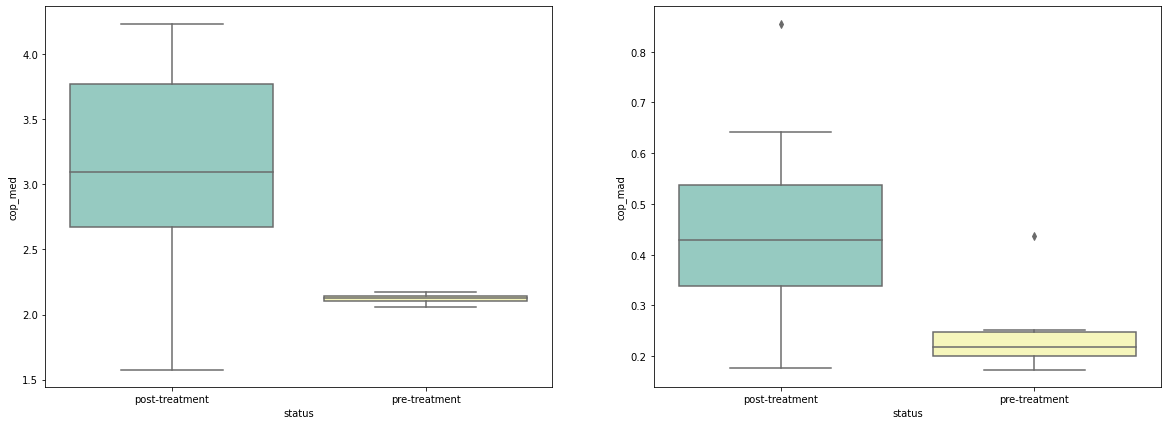

In [31]:
# cop box plots
fig, ax = plt.subplots(1,2,figsize=(20,7))
sns.boxplot(x='status', 
            y='cop_med', 
            data=daily_data, 
            palette="Set3",
            ax=ax[0])

sns.boxplot(x='status', 
            y='cop_mad', 
            data=daily_data, 
            palette="Set3",
            ax=ax[1])

<AxesSubplot:xlabel='status', ylabel='eer_mad'>

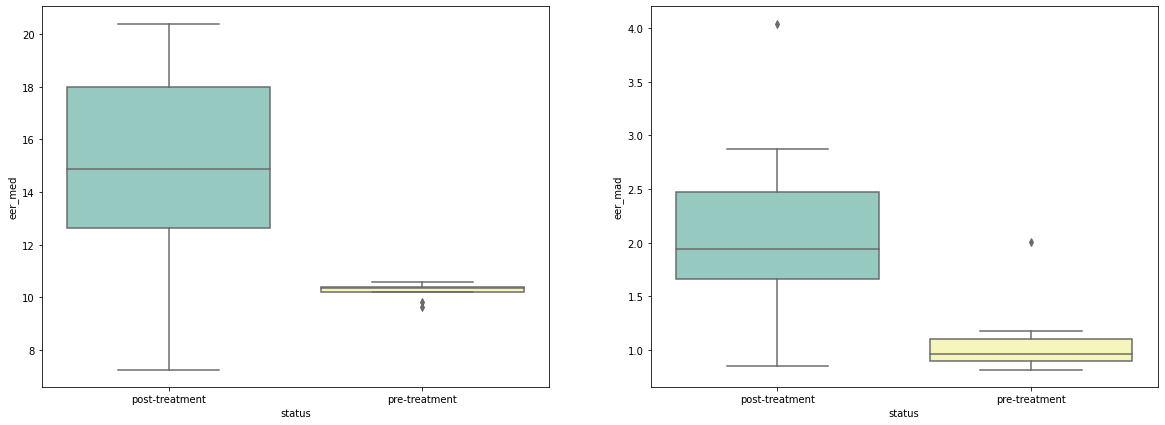

In [32]:
### eer box plots

fig, ax = plt.subplots(1,2,figsize=(20,7))
sns.boxplot(x='status', 
            y='eer_med', 
            data=daily_data, 
            palette="Set3",
            ax=ax[0])

sns.boxplot(x='status', 
            y='eer_mad', 
            data=daily_data, 
            palette="Set3",
            ax=ax[1])

<AxesSubplot:xlabel='status', ylabel='ton_1_compressor_mad'>

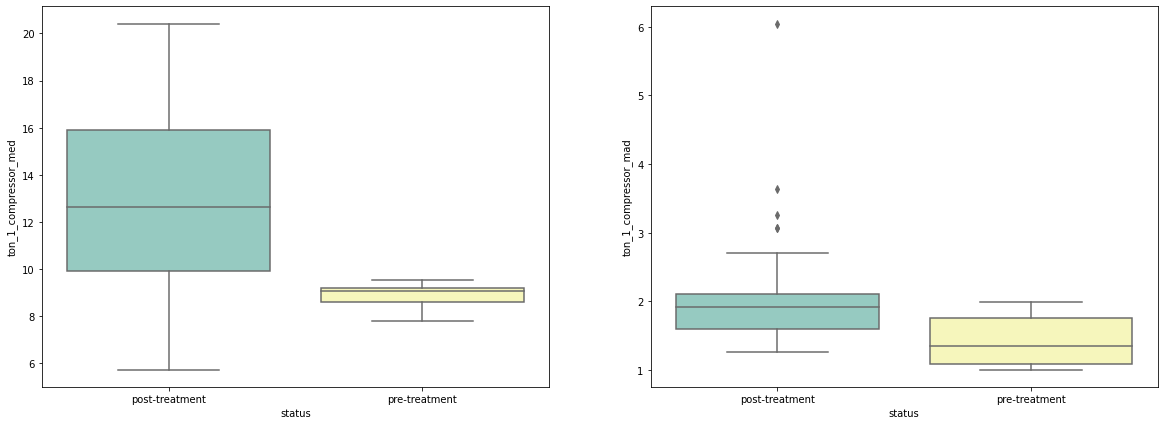

In [33]:
# ton (1 compressor) box plots

fig, ax = plt.subplots(1,2,figsize=(20,7))
sns.boxplot(x='status', 
            y='ton_1_compressor_med', 
            data=daily_data, 
            palette="Set3",
            ax=ax[0])

sns.boxplot(x='status', 
            y='ton_1_compressor_mad', 
            data=daily_data, 
            palette="Set3",
            ax=ax[1])


<AxesSubplot:xlabel='status', ylabel='ton_2_compressors_mad'>

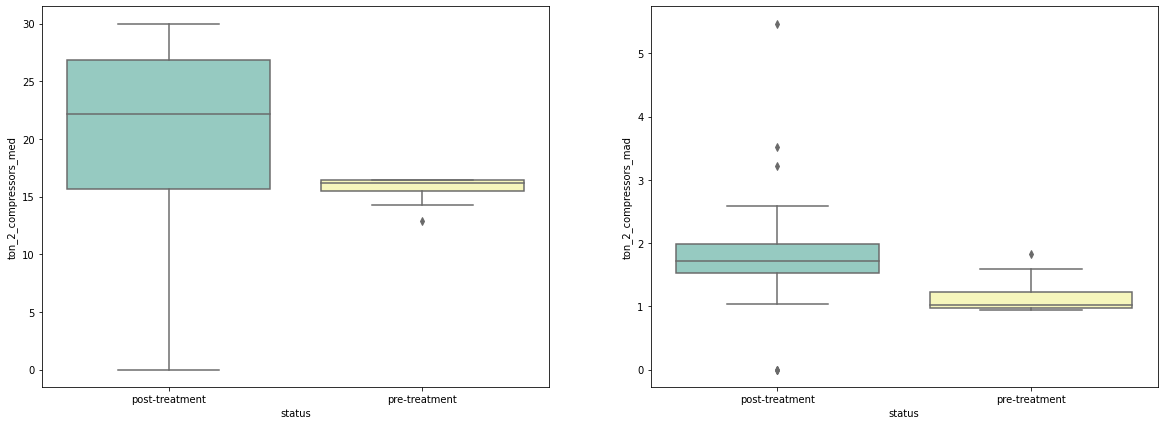

In [34]:
# ton (2 compressors) box plots

fig, ax = plt.subplots(1,2,figsize=(20,7))
sns.boxplot(x='status', 
            y='ton_2_compressors_med', 
            data=daily_data, 
            palette="Set3",
            ax=ax[0])

sns.boxplot(x='status', 
            y='ton_2_compressors_mad', 
            data=daily_data, 
            palette="Set3",
            ax=ax[1])

<AxesSubplot:xlabel='status', ylabel='ton_3_compressors_mad'>

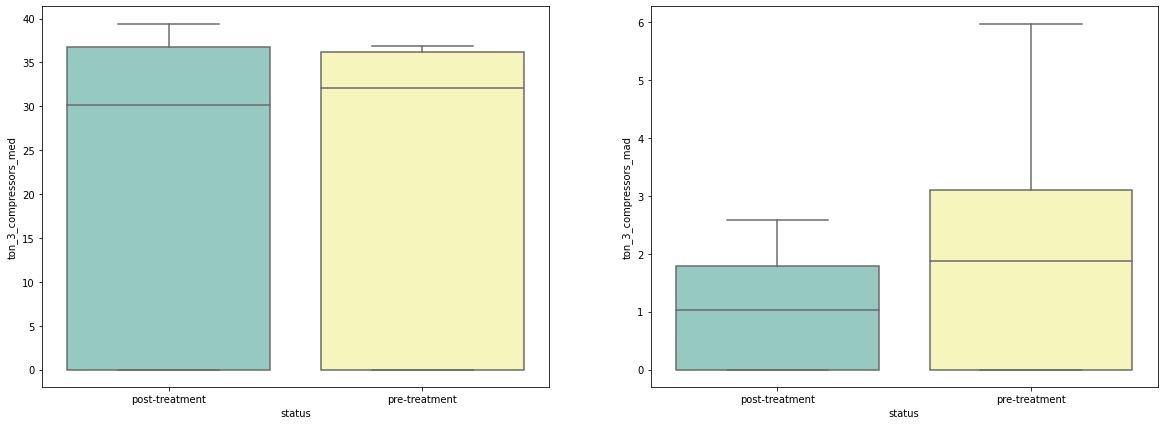

In [35]:
# ton (3 compressors) box plots

fig, ax = plt.subplots(1,2,figsize=(20,7))
sns.boxplot(x='status', 
            y='ton_3_compressors_med', 
            data=daily_data, 
            palette="Set3",
            ax=ax[0])

sns.boxplot(x='status', 
            y='ton_3_compressors_mad', 
            data=daily_data, 
            palette="Set3",
            ax=ax[1])

<AxesSubplot:xlabel='status', ylabel='ton_4_compressors_mad'>

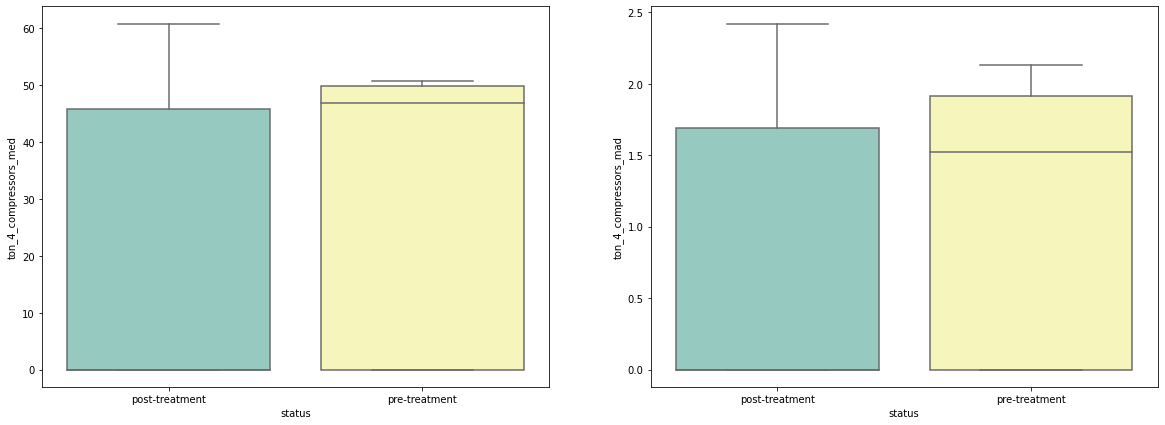

In [36]:
# ton (4 compressors) box plots

fig, ax = plt.subplots(1,2,figsize=(20,7))
sns.boxplot(x='status', 
            y='ton_4_compressors_med', 
            data=daily_data, 
            palette="Set3",
            ax=ax[0])

sns.boxplot(x='status', 
            y='ton_4_compressors_mad', 
            data=daily_data, 
            palette="Set3",
            ax=ax[1])

<AxesSubplot:xlabel='status', ylabel='max_temp'>

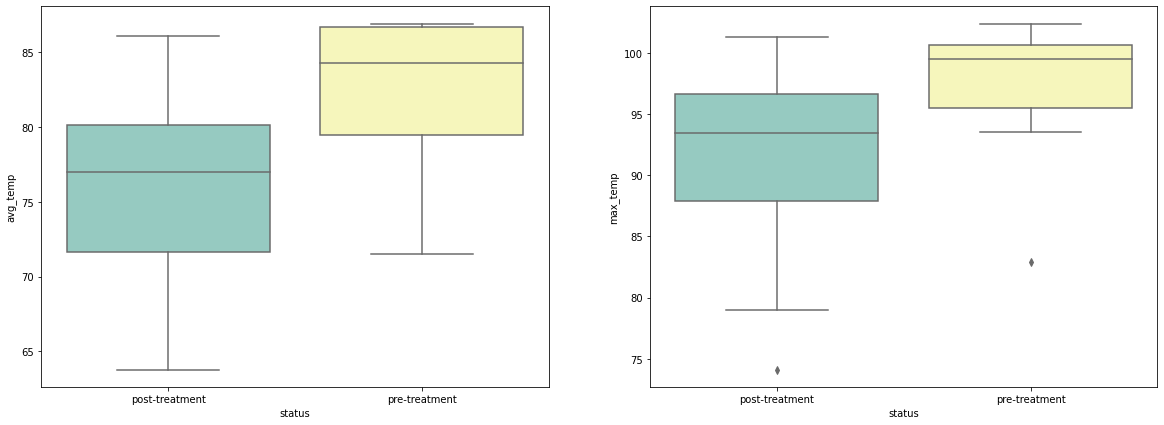

In [37]:
# temperature box plots

fig, ax = plt.subplots(1,2,figsize=(20,7))
sns.boxplot(x='status', 
            y='avg_temp', 
            data=daily_data, 
            palette="Set3",
            ax=ax[0])

sns.boxplot(x='status', 
            y='max_temp', 
            data=daily_data, 
            palette="Set3",
            ax=ax[1])

<AxesSubplot:xlabel='status', ylabel='time_4'>

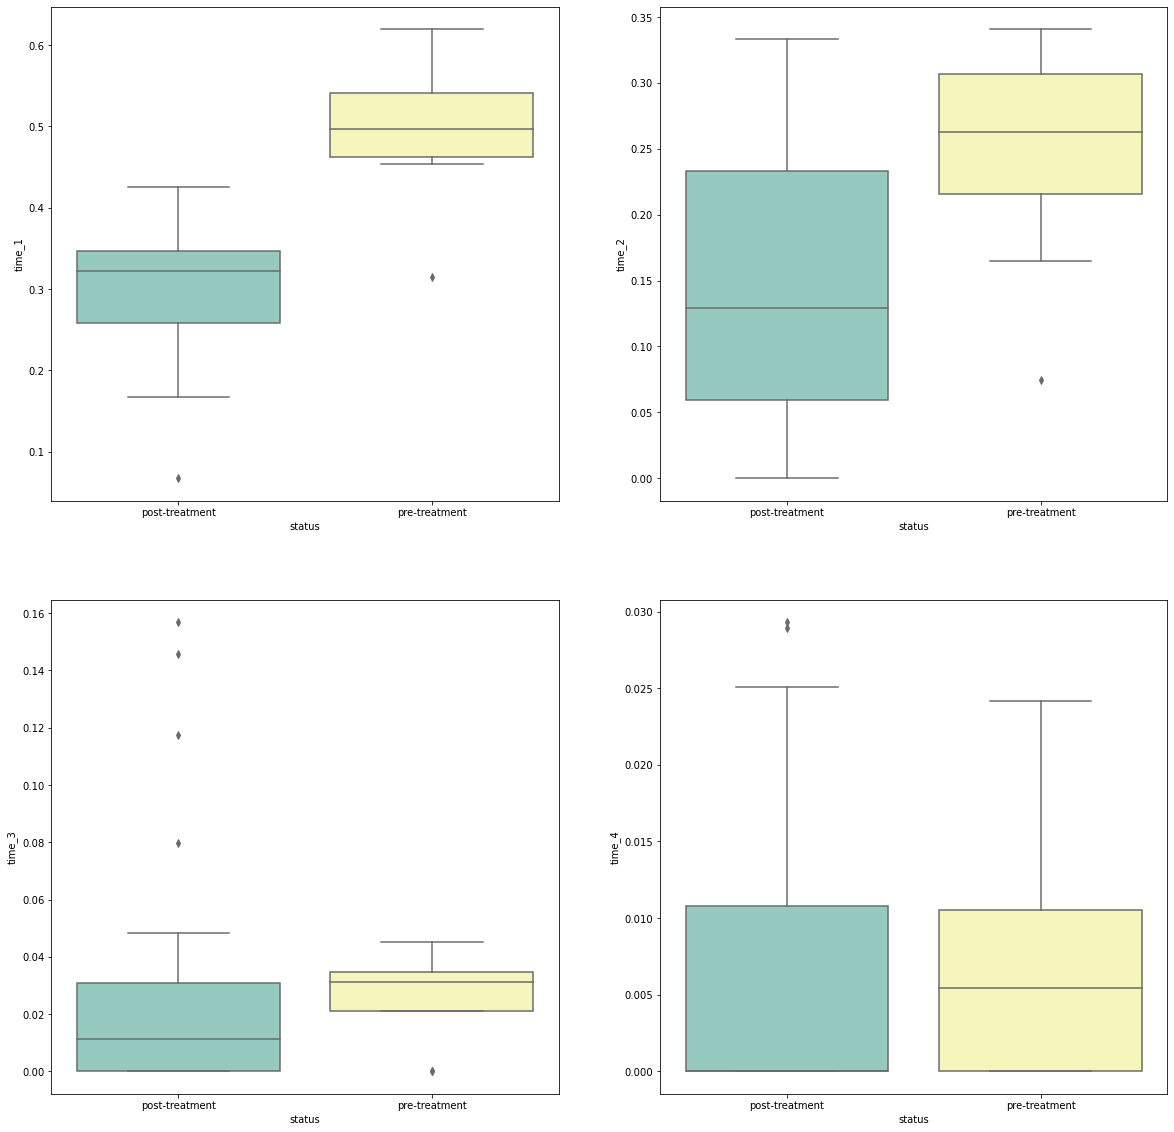

In [38]:
# compressor times box plots

fig, ax = plt.subplots(2,2,figsize=(20,20))
sns.boxplot(x='status', 
            y='time_1', 
            data=daily_data, 
            palette="Set3",
            ax=ax[0,0])

sns.boxplot(x='status', 
            y='time_2', 
            data=daily_data, 
            palette="Set3",
            ax=ax[0,1])

sns.boxplot(x='status', 
            y='time_3', 
            data=daily_data, 
            palette="Set3",
            ax=ax[1,0])

sns.boxplot(x='status', 
            y='time_4', 
            data=daily_data, 
            palette="Set3",
            ax=ax[1,1])

Preliminary conclusions.

The HVAC machine in **May** is:
- more efficient (smaller kwton, larger eer and cop)
- has more capacity (when n_compressors = 1 or 2)
- n_compressors = 1 or 2 less often.

## Time compressors are on

We theorized that the amount of time compressors stayed on during a day is proportional to the outside air temp.  Accordingly, we calculate the fraction of the total time during the day and plotted it vs the average outdoor air temp.

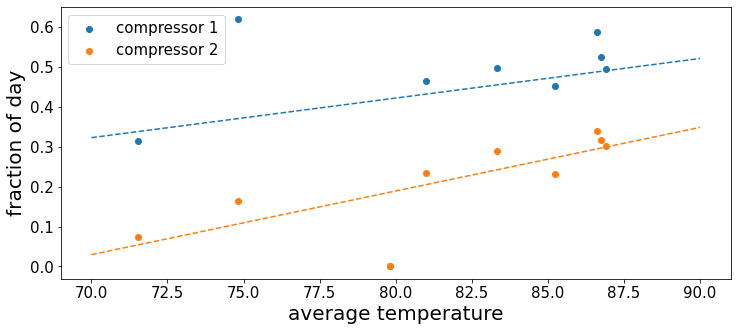

In [40]:
# instantiate a linear regressor model
from sklearn.linear_model import LinearRegression
model = LinearRegression()

# prepare figure 
fig, ax = plt.subplots(figsize=(12,5))

# plot compressor 1-2 times against average temperature
ax.scatter(daily_Oct.avg_temp, daily_Oct.time_1, label='compressor 1')
ax.scatter(daily_Oct.avg_temp, daily_Oct.time_2, label='compressor 2')
ax.set_xlabel('average temperature', fontsize=20)
ax.set_ylabel('fraction of day', fontsize=20)

# fit the regression model to the compressor 1 data
model.fit(daily_Oct[['avg_temp']],daily_Oct.time_1)
y1_plot = model.predict(x_plot[:,None])

# plot the model 
x_plot = np.linspace(70,90,9)
ax.plot(x_plot,y1_plot,'--')


# fit the regression model to the conpressor 2 data
model.fit(daily_Oct[['avg_temp']],daily_Oct.time_2)
y2_plot = model.predict(x_plot[:,None])

# plot the model
ax.plot(x_plot,y2_plot,'--',c='C1')

ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)
ax.legend(fontsize=15)

## Random Forest classifier

**Goal:** train a Machine Learning Model that automatically distinguish between
- post-treatment days (normal)
- pre-treatment days (anomalies)

We will train a **Random Forest model** on the October (7 days) and May (31 days) data.

**Variables:** kwton, eer and COP
- Daily median values
- Median absolute deviation 


In [44]:
# feature matrix 
X = daily_data.drop(['status','time_1','time_2','time_3','time_4','avg_temp','max_temp'], axis=1)

# target vector
y = daily_data.status

In [45]:
# import Random Forest
from sklearn.ensemble import RandomForestClassifier

# instantiate the Random Forest Classifier
forest = RandomForestClassifier(n_estimators=100, # number of trees
                             max_depth=2)
# train the Random Forest
forest.fit(X,y)
y_pred = forest.predict(X)

In [54]:
from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix

In [55]:
# compute accuracy of the model
print('Model accuracy: '+str(accuracy_score(y,y_pred).round(2)))

Model accuracy: 0.97


Text(0, 0.5, 'true label')

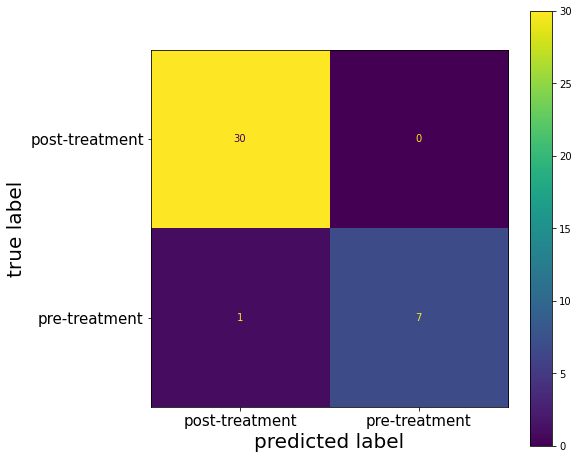

In [56]:
# plot confusion matrix
fig, ax = plt.subplots(figsize=(8,8))
plot_confusion_matrix(forest,X,y,ax=ax)
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)
ax.set_xlabel('predicted label', fontsize=20)
ax.set_ylabel('true label', fontsize=20)

The Random Forest model performed well on the May-Oct data:
- 97% of accuracy, 
- only one day was misclassified (Oct 8).

However, it is ifficult to predict how the model will perform on new data.
We would need more labeled data.

We can compute **how much each feature contributes to the prediction.**

Text(0.5, 1.0, 'variable importance')

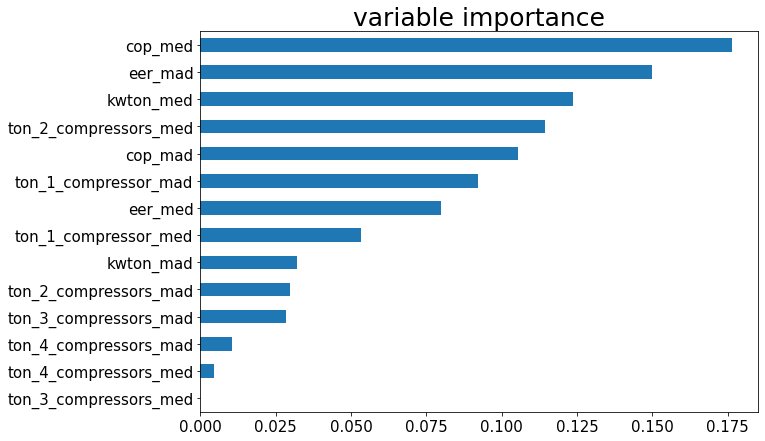

In [57]:
importance = pd.DataFrame(data = forest.feature_importances_, 
                           index = X.columns,
                           columns = ['feature_importance'])

fig, ax = plt.subplots(figsize=(10,7))
importance.feature_importance.sort_values(ascending=True).plot(ax=ax, kind='barh')
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)
ax.set_title('variable importance', fontsize=25)

## Efficiency variables: EER, COP and kW/Ton

**EER vs COP**

The EER (energy efficiency ratio) and the COP (coefficient of performance) measure essentially the same thing.

Text(0.5, 1.0, 'October 2019')

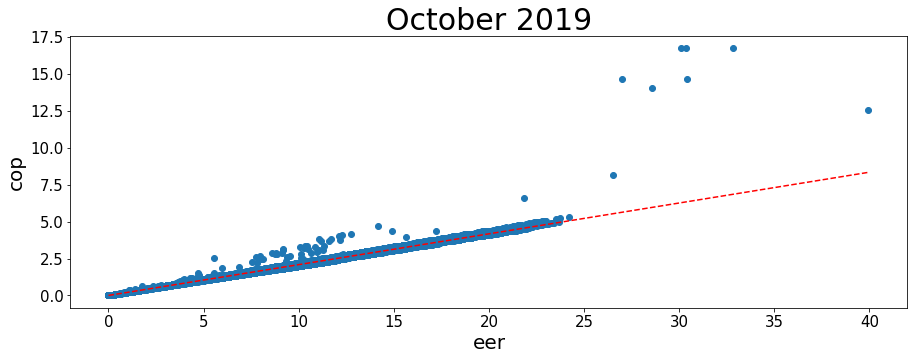

In [58]:
# October eer and cop data
fig, ax = plt.subplots(figsize=(15,5))
ax.scatter(Oct[Oct.n_compressors>0].eer, Oct[Oct.n_compressors>0].COP)
ax.set_xlabel('eer', fontsize=20)
ax.set_ylabel('cop', fontsize=20)
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)

x_plot = np.linspace(0,40,9)
# fit 1
model.fit(Oct[['eer']],Oct.COP)
y1_plot = model.predict(x_plot[:,None])
ax.plot(x_plot,y1_plot,'--',c='r')
ax.set_title('October 2019',fontsize=30)

(0.0, 30.0)

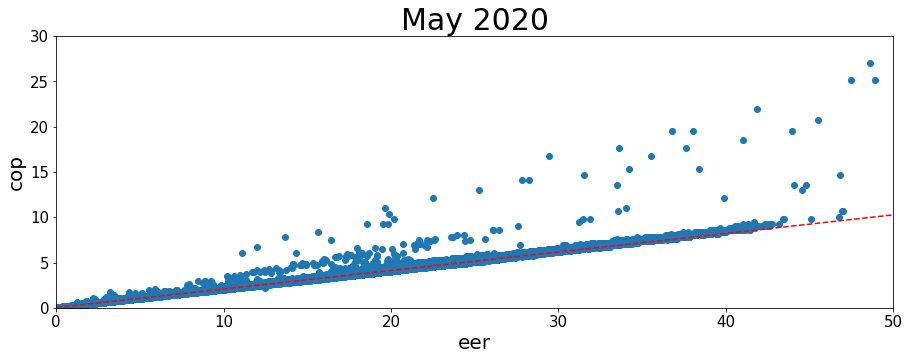

In [63]:
# May COP and eer data
fig, ax = plt.subplots(figsize=(15,5))
ax.scatter(May[May.n_compressors>0].eer, May[May.n_compressors>0].COP)
ax.set_xlabel('eer', fontsize=20)
ax.set_ylabel('cop', fontsize=20)
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)

x_plot = np.linspace(0,50,9)
# fit 1
model.fit(May[['eer']],May.COP)
y1_plot = model.predict(x_plot[:,None])
ax.plot(x_plot,y1_plot,'--',c='r')
ax.set_title('May 2020',fontsize=30)
ax.set_xlim([0,50])
ax.set_ylim([0,30])

The outliers coincide with EER and COP spikes. Maybe they are just sensor errors.

Text(0.5, 1.0, 'October 2019')

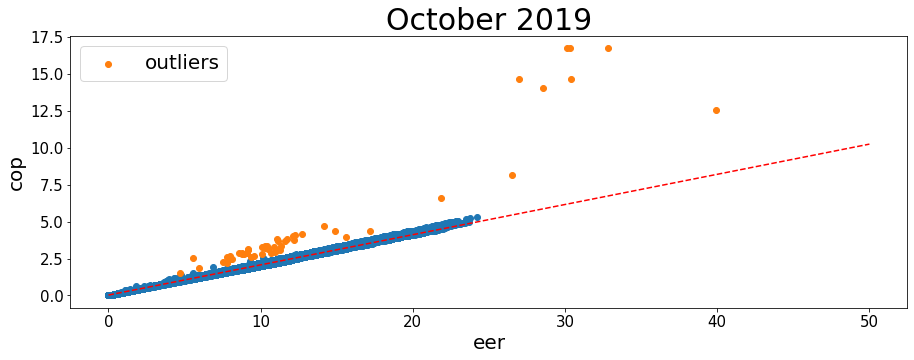

In [68]:
# find October anomalies
COP_pred = model.predict(Oct[['eer']])
threshold = 0.5
outliers = np.abs(Oct.COP - COP_pred)>=threshold
inliers = np.abs(Oct.COP - COP_pred)<=threshold
mask_out = (Oct.n_compressors>0) & outliers
mask_in = (Oct.n_compressors>0) & inliers

# plot 
fig, ax = plt.subplots(figsize=(15,5))
ax.scatter(Oct[mask_in].eer, Oct[mask_in].COP)
ax.scatter(Oct[mask_out].eer, Oct[mask_out].COP, label='outliers')

ax.plot(x_plot,y1_plot,'--',c='r')

ax.legend(fontsize=20, loc='upper left')
ax.set_xlabel('eer', fontsize=20)
ax.set_ylabel('cop', fontsize=20)
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)
ax.set_title('October 2019',fontsize=30)

Text(0.5, 1.0, 'October 8, 2019')

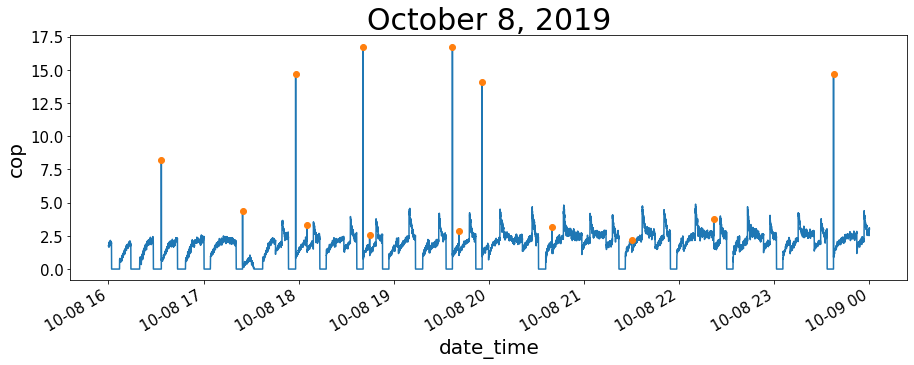

In [69]:
fig, ax = plt.subplots(figsize=(15,5))

date_time = (Oct.index.day==8) & (Oct.index.hour>15)

Oct[date_time].COP.plot(ax=ax)
Oct[mask_out & date_time].COP.plot(style='o', ax=ax)

ax.set_xlabel('date_time', fontsize=20)
ax.set_ylabel('cop', fontsize=20)
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)
ax.set_title('October 8, 2019',fontsize=30)

(0.0, 30.0)

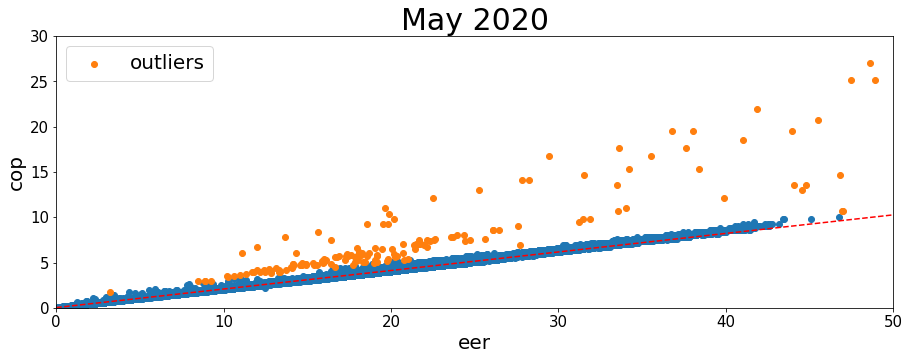

In [70]:
# find May anomalies
COP_pred = model.predict(May[['eer']])
threshold = 1
outliers = np.abs(May.COP - COP_pred)>=threshold
inliers = np.abs(May.COP - COP_pred)<=threshold
mask_out = (May.n_compressors>0) & outliers
mask_in = (May.n_compressors>0) & inliers

# plot
fig, ax = plt.subplots(figsize=(15,5))
ax.scatter(May[mask_in].eer, May[mask_in].COP)
ax.scatter(May[mask_out].eer, May[mask_out].COP, label='outliers')

ax.plot(x_plot,y1_plot,'--',c='r')

ax.legend(fontsize=20, loc='upper left')
ax.set_xlabel('eer', fontsize=20)
ax.set_ylabel('cop', fontsize=20)
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)
ax.set_title('May 2020',fontsize=30)
ax.set_xlim([0,50])
ax.set_ylim([0,30])

Text(0.5, 1.0, 'May 13, 2020')

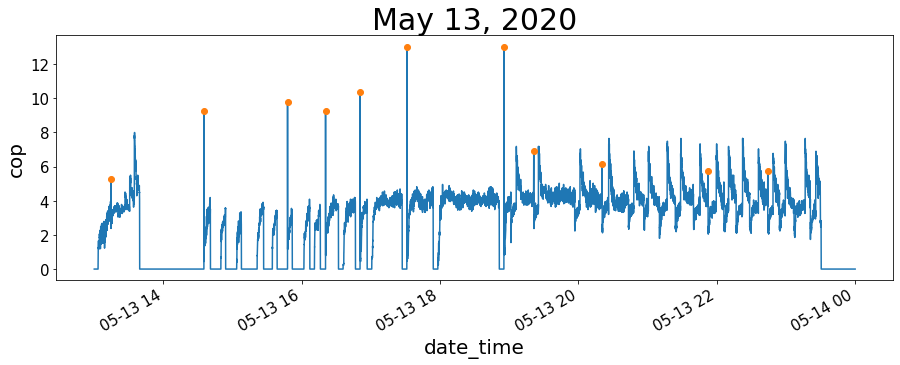

In [71]:
fig, ax = plt.subplots(figsize=(15,5))

date_time = (May.index.day==13) & (May.index.hour>12)

May[date_time].COP.plot(ax=ax)
May[mask_out & date_time].COP.plot(style='o', ax=ax)

ax.set_xlabel('date_time', fontsize=20)
ax.set_ylabel('cop', fontsize=20)
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)
ax.set_title('May 13, 2020',fontsize=30)

**COP vs KW/Ton**

COP and kW/Ton are inversely related.

(0.0, 50.0)

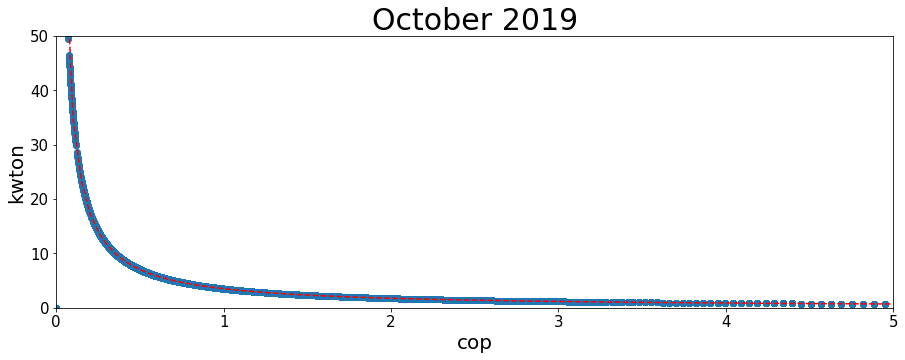

In [74]:
fig, ax = plt.subplots(figsize=(15,5))
ax.scatter(Oct[Oct.n_compressors>0].COP, Oct[Oct.n_compressors>0].kwton)
ax.set_xlabel('cop', fontsize=20)
ax.set_ylabel('kwton', fontsize=20)
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)

x_plot = np.linspace(0.0001,5,100)
# model fit
model.fit(1/Oct[(Oct.n_compressors>0) & (Oct.COP>0)][['COP']],
          Oct[(Oct.n_compressors>0) & (Oct.COP>0)].kwton
         )

y1_plot = model.predict((1/x_plot)[:,None])
ax.plot(x_plot,y1_plot,'--',c='r')
ax.set_title('October 2019',fontsize=30)
ax.set_xlim([0,5])
ax.set_ylim([0,50])

(0.0, 50.0)

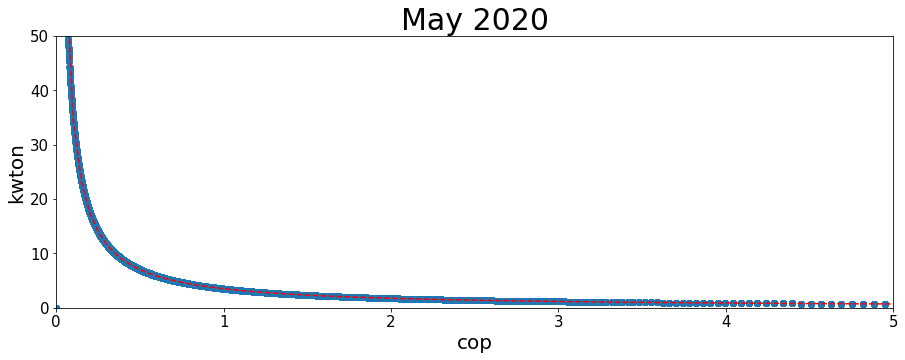

In [72]:
fig, ax = plt.subplots(figsize=(15,5))
ax.scatter(May[May.n_compressors>0].COP, May[May.n_compressors>0].kwton)
ax.set_xlabel('cop', fontsize=20)
ax.set_ylabel('kwton', fontsize=20)
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)

x_plot = np.linspace(0.0001,5,100)
# model fit
model.fit(1/May[(May.n_compressors>0) & (May.COP>0)][['COP']],
          May[(May.n_compressors>0) & (May.COP>0)].kwton
         )

y1_plot = model.predict((1/x_plot)[:,None])
ax.plot(x_plot,y1_plot,'--',c='r')
ax.set_title('May 2020',fontsize=30)
ax.set_xlim([0,5])
ax.set_ylim([0,50])

**EER vs KW/ton**

EER and kW/Ton are essentially inversely related

(0.0, 50.0)

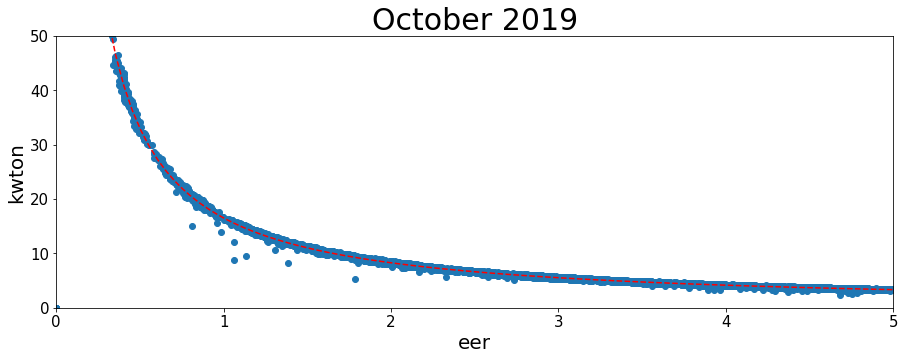

In [75]:
fig, ax = plt.subplots(figsize=(15,5))
ax.scatter(Oct[Oct.n_compressors>0].eer, Oct[Oct.n_compressors>0].kwton)
ax.set_xlabel('eer', fontsize=20)
ax.set_ylabel('kwton', fontsize=20)
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)

x_plot = np.linspace(0.0001,5,100)
# model fit
model.fit(1/Oct[(Oct.n_compressors>0) & (Oct.eer>0)][['eer']],
          Oct[(Oct.n_compressors>0) & (Oct.eer>0)].kwton
         )

y1_plot = model.predict((1/x_plot)[:,None])
ax.plot(x_plot,y1_plot,'--',c='r')
ax.set_title('October 2019',fontsize=30)
ax.set_xlim([0,5])
ax.set_ylim([0,50])

(0.0, 50.0)

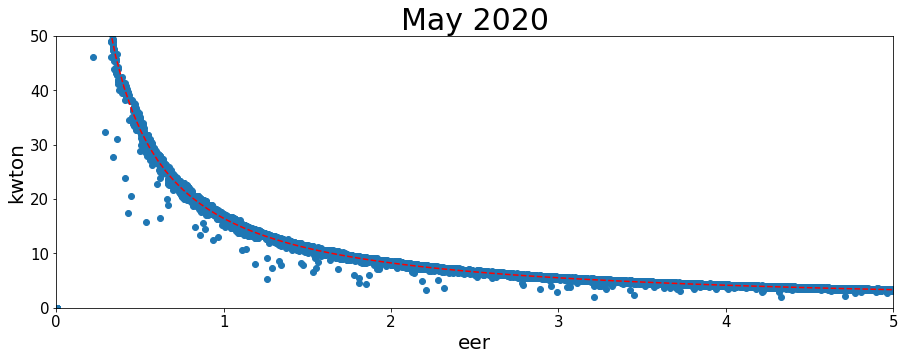

In [73]:
fig, ax = plt.subplots(figsize=(15,5))
ax.scatter(May[(May.n_compressors>0)  & (May.eer<5)].eer, 
           May[(May.n_compressors>0)  & (May.eer<5)].kwton)
ax.set_xlabel('eer', fontsize=20)
ax.set_ylabel('kwton', fontsize=20)
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)

x_plot = np.linspace(0.0001,5,100)
# model fit
model.fit(1/May[(May.n_compressors>0) & (May.eer>0.1) & (May.eer<5)][['eer']],
          May[(May.n_compressors>0) & (May.eer>0.1) & (May.eer<5)].kwton
         )

y1_plot = model.predict((1/x_plot)[:,None])
ax.plot(x_plot,y1_plot,'--',c='r')
ax.set_title('May 2020',fontsize=30)
ax.set_xlim([0,5])
ax.set_ylim([0,50])

Again, the outliers coincide with the peaks

(0.0, 50.0)

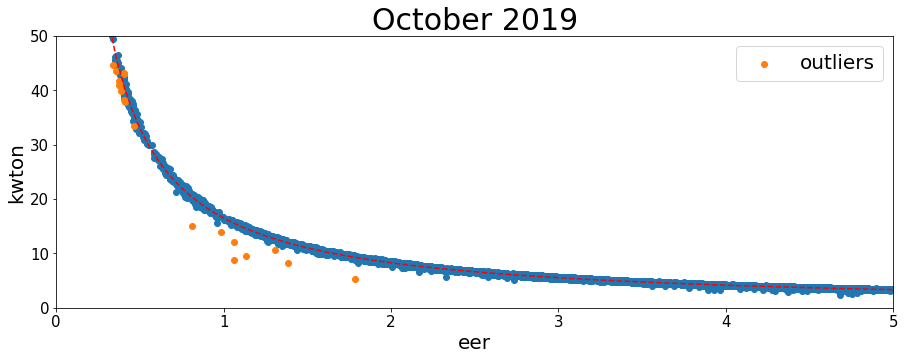

In [76]:
# find October outliers
kwton_pred = model.predict(1/Oct[Oct.eer>0][['eer']])
threshold = 2
outliers = np.abs(Oct[Oct.eer>0].kwton - kwton_pred)>threshold
inliers = np.abs(Oct[Oct.eer>0].kwton - kwton_pred)<=threshold
mask_out = (Oct.eer>0) & (Oct.n_compressors>0) & outliers 
mask_in = (Oct.eer>0) & (Oct.n_compressors>0) & inliers

fig, ax = plt.subplots(figsize=(15,5))
ax.scatter(Oct[mask_in].eer, Oct[mask_in].kwton)
ax.scatter(Oct[mask_out].eer, Oct[mask_out].kwton, label='outliers')

ax.plot(x_plot,y1_plot,'--',c='r')

ax.legend(fontsize=20, loc='upper right')
ax.set_xlabel('eer', fontsize=20)
ax.set_ylabel('kwton', fontsize=20)
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)
ax.set_title('October 2019',fontsize=30)
ax.set_xlim([0,5])
ax.set_ylim([0,50])

Text(0.5, 1.0, 'October 5, 2019')

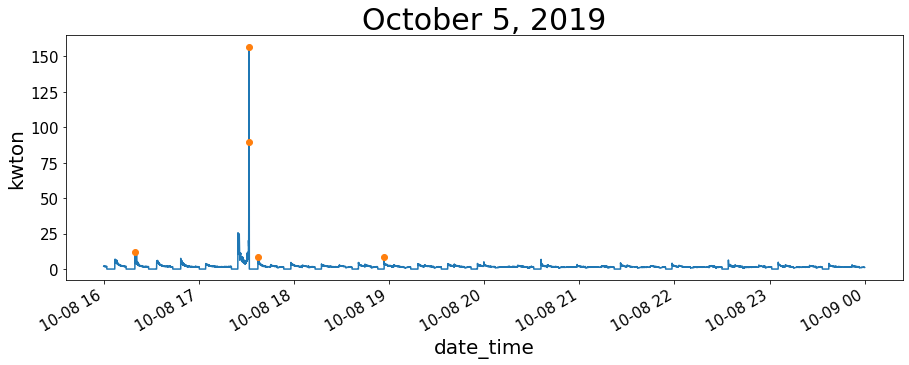

In [77]:
fig, ax = plt.subplots(figsize=(15,5))

date_time = (Oct.index.day==8) & (Oct.index.hour>15)

Oct[date_time].kwton.plot(ax=ax)
Oct[mask_out & date_time].kwton.plot(style='o', ax=ax)

ax.set_xlabel('date_time', fontsize=20)
ax.set_ylabel('kwton', fontsize=20)
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)
ax.set_title('October 5, 2019',fontsize=30)

## Energy consumption variable: kw

The variable kw is essentially a linear function of the number of compressors

Text(0.5, 1.0, 'May 2020')

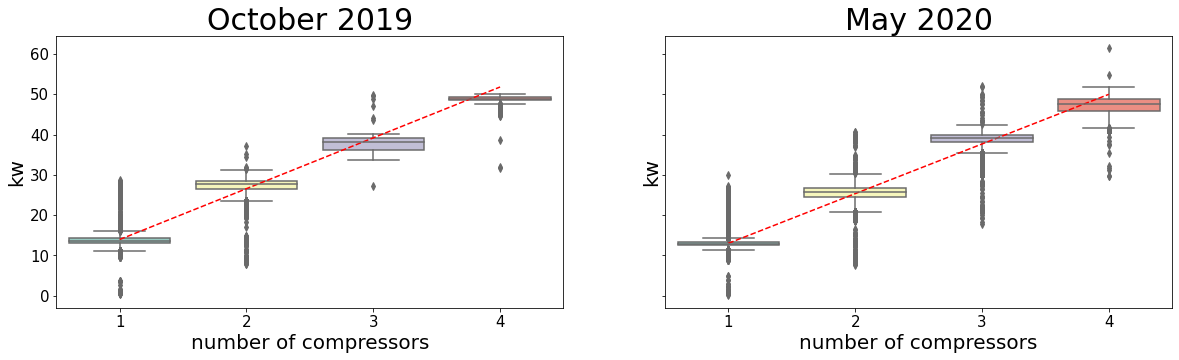

In [78]:
fig, ax = plt.subplots(1,2, sharey=True, figsize=(20,5))
sns.boxplot(x='n_compressors', 
            y='kw', 
            data=Oct[Oct.n_compressors>0], 
            palette="Set3",
            ax=ax[0])

# fit
model.fit(Oct[Oct.n_compressors>0][['n_compressors']],Oct[Oct.n_compressors>0].kw)
x_plot = np.array([1,2,3,4])
y_plot = model.predict(x_plot[:,None])
ax[0].plot(x_plot-1,y_plot,'--',c='r')


ax[0].set_xlabel('number of compressors', fontsize=20)
ax[0].set_ylabel('kw', fontsize=20)
ax[0].tick_params(axis='x', labelsize=15)
ax[0].tick_params(axis='y', labelsize=15)
ax[0].set_title('October 2019',fontsize=30)


sns.boxplot(x='n_compressors', 
            y='kw', 
            data=May[May.n_compressors>0], 
            palette="Set3",
            ax=ax[1])

# fit
model.fit(May[May.n_compressors>0][['n_compressors']],May[May.n_compressors>0].kw)
x_plot = np.array([1,2,3,4])
y_plot = model.predict(x_plot[:,None])
ax[1].plot(x_plot-1,y_plot,'--',c='r')

ax[1].set_xlabel('number of compressors', fontsize=20)
ax[1].set_ylabel('kw', fontsize=20)
ax[1].tick_params(axis='x', labelsize=15)
ax[1].tick_params(axis='y', labelsize=15)
ax[1].set_title('May 2020',fontsize=30)

**Outliers:** points outside the range q1 - 1.5*iqr, q3 + 1.5*iqr, where q1 and q3 are, respectively, the first and third quartiles, and iqr = q3-q1 is the inter quartile range

In [79]:
# functions to compute quartiles and inter quartile range
def q1(x):
    return x.quantile(0.25)

def q3(x):
    return x.quantile(0.75)

def iqr(x):
    return x.quantile(0.75)-x.quantile(0.25)

In [80]:
# October data quartiles
qOct = Oct[Oct.n_compressors>0].groupby('n_compressors').kw.agg(['median',q1,q3,iqr])
qOct

,median,q1,q3,iqr
n_compressors,,,,
1,13.67,12.99,14.24,1.25
2,27.73,26.41,28.35,1.94
3,38.06,36.26,39.03,2.77
4,48.91,48.64,49.33,0.69


In [81]:
# October outliers
outliers_Oct = ((Oct.n_compressors==1) & ((Oct.kw>qOct.loc[1,'q3']+1.5*qOct.loc[1,'iqr']) | (Oct.kw<qOct.loc[1,'q1']-1.5*qOct.loc[1,'iqr']))) \
             | ((Oct.n_compressors==2) & ((Oct.kw>qOct.loc[2,'q3']+1.5*qOct.loc[2,'iqr']) | (Oct.kw<qOct.loc[2,'q1']-1.5*qOct.loc[2,'iqr']))) \
             | ((Oct.n_compressors==3) & ((Oct.kw>qOct.loc[3,'q3']+1.5*qOct.loc[3,'iqr']) | (Oct.kw<qOct.loc[3,'q1']-1.5*qOct.loc[3,'iqr']))) \
             | ((Oct.n_compressors==4) & ((Oct.kw>qOct.loc[4,'q3']+1.5*qOct.loc[4,'iqr']) | (Oct.kw<qOct.loc[4,'q1']-1.5*qOct.loc[4,'iqr'])))

outliers_Oct.sum()

5339

In [82]:
# May data quartiles
qMay = May[May.n_compressors>0].groupby('n_compressors').kw.agg(['median',q1,q3,iqr])
qMay

,median,q1,q3,iqr
n_compressors,,,,
1,12.87,12.47,13.24,0.77
2,25.86,24.42,26.77,2.35
3,39.14,38.06,39.84,1.78
4,47.60,45.86,48.76,2.90


In [84]:
# May outliers
outliers_May = ((May.n_compressors==1) & ((May.kw>qMay.loc[1,'q3']+1.5*qMay.loc[1,'iqr']) | (May.kw<qMay.loc[1,'q1']-1.5*qMay.loc[1,'iqr']))) \
             | ((May.n_compressors==2) & ((May.kw>qMay.loc[2,'q3']+1.5*qMay.loc[2,'iqr']) | (May.kw<qMay.loc[2,'q1']-1.5*qMay.loc[2,'iqr']))) \
             | ((May.n_compressors==3) & ((May.kw>qMay.loc[3,'q3']+1.5*qMay.loc[3,'iqr']) | (May.kw<qMay.loc[3,'q1']-1.5*qMay.loc[3,'iqr']))) \
             | ((May.n_compressors==4) & ((May.kw>qMay.loc[4,'q3']+1.5*qMay.loc[4,'iqr']) | (May.kw<qMay.loc[4,'q1']-1.5*qMay.loc[4,'iqr'])))

outliers_May.sum()

16830

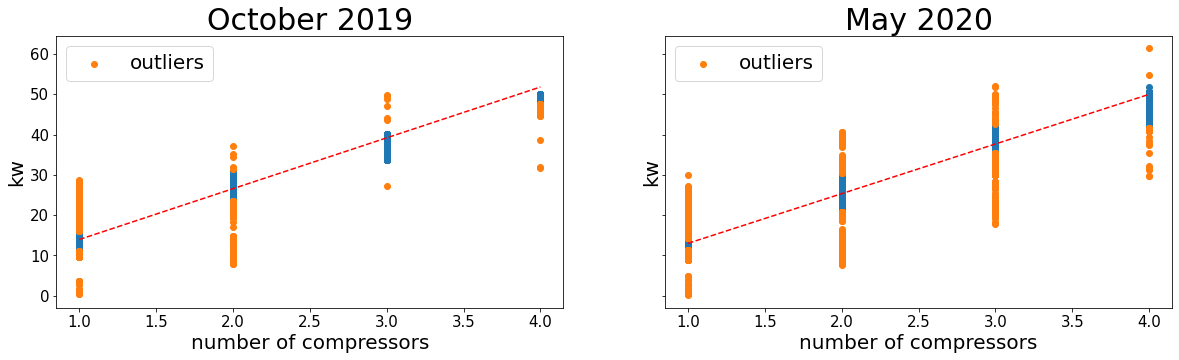

In [86]:
fig, ax = plt.subplots(1,2, sharey=True, figsize=(20,5))

ax[0].scatter(Oct[(Oct.n_compressors>0) & (~outliers_Oct)].n_compressors,Oct[(Oct.n_compressors>0) & (~outliers_Oct)].kw)
ax[0].scatter(Oct[outliers_Oct].n_compressors,Oct[outliers_Oct].kw, label='outliers')

# fit
model.fit(Oct[Oct.n_compressors>0][['n_compressors']],Oct[Oct.n_compressors>0].kw)
x_plot = np.array([1,2,3,4])
y_plot = model.predict(x_plot[:,None])
ax[0].plot(x_plot,y_plot,'--',c='r')

ax[0].set_xlabel('number of compressors', fontsize=20)
ax[0].set_ylabel('kw', fontsize=20)
ax[0].tick_params(axis='x', labelsize=15)
ax[0].tick_params(axis='y', labelsize=15)
ax[0].set_title('October 2019',fontsize=30)
ax[0].legend(fontsize=20,loc='upper left')


ax[1].scatter(May[(May.n_compressors>0) & (~outliers_May)].n_compressors,May[(May.n_compressors>0)& (~outliers_May)].kw)
ax[1].scatter(May[outliers_May].n_compressors,May[outliers_May].kw, label='outliers')

# fit
model.fit(May[May.n_compressors>0][['n_compressors']],May[May.n_compressors>0].kw)
x_plot = np.array([1,2,3,4])
y_plot = model.predict(x_plot[:,None])
ax[1].plot(x_plot,y_plot,'--',c='r')

ax[1].set_xlabel('number of compressors', fontsize=20)
ax[1].set_ylabel('kw', fontsize=20)
ax[1].tick_params(axis='x', labelsize=15)
ax[1].tick_params(axis='y', labelsize=15)
ax[1].set_title('May 2020',fontsize=30)
ax[1].legend(fontsize=20, loc='upper left')

Outliers happen when the compressors turn on/off


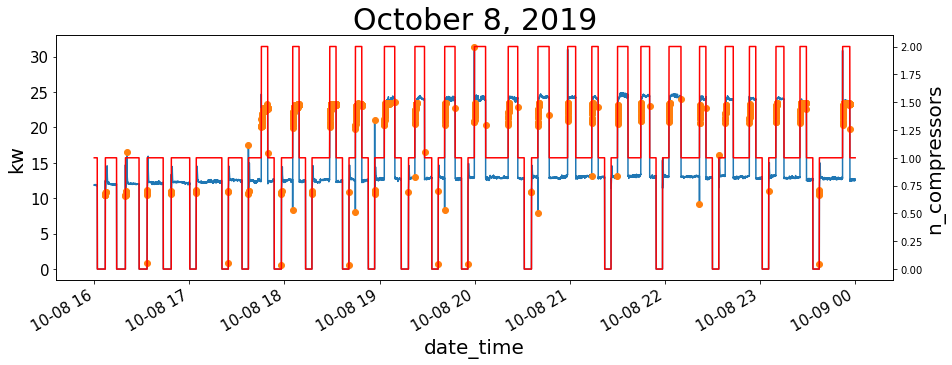

In [87]:
fig, ax = plt.subplots(figsize=(15,5))

date_time = (Oct.index.day==8) & (Oct.index.hour>15)

Oct[date_time].kw.plot(ax=ax)
Oct[outliers_Oct & date_time].kw.plot(style='o', ax=ax)

ax.set_xlabel('date_time', fontsize=20)
ax.set_ylabel('kw', fontsize=20)
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)
ax.set_title('October 8, 2019',fontsize=30)

axx = ax.twinx()
Oct[date_time].n_compressors.plot(ax=axx,c='r')
axx.set_ylabel('n_compressors', fontsize=20)
ax.tick_params(axis='y', labelsize=15)

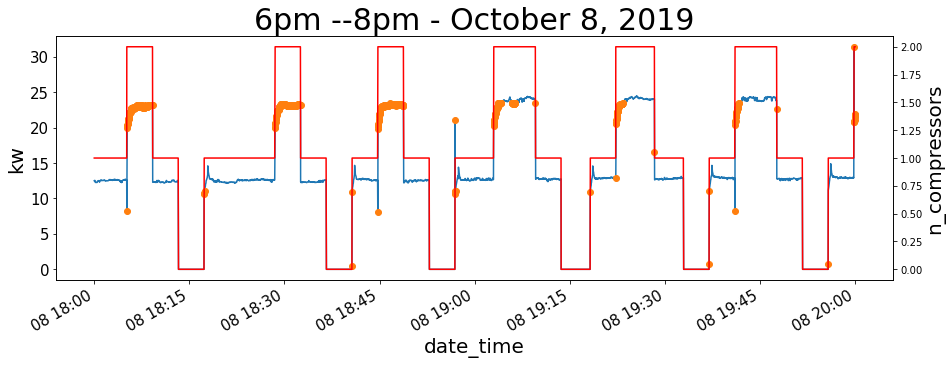

In [88]:
fig, ax = plt.subplots(figsize=(15,5))

date_time = (Oct.index.day==8) & (Oct.index.hour.isin([18,19]))

Oct[date_time].kw.plot(ax=ax)
Oct[outliers_Oct & date_time].kw.plot(style='o', ax=ax)

ax.set_xlabel('date_time', fontsize=20)
ax.set_ylabel('kw', fontsize=20)
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)
ax.set_title('6pm --8pm - October 8, 2019',fontsize=30)

axx = ax.twinx()
Oct[date_time].n_compressors.plot(ax=axx,c='r')
axx.set_ylabel('n_compressors', fontsize=20)
ax.tick_params(axis='y', labelsize=15)

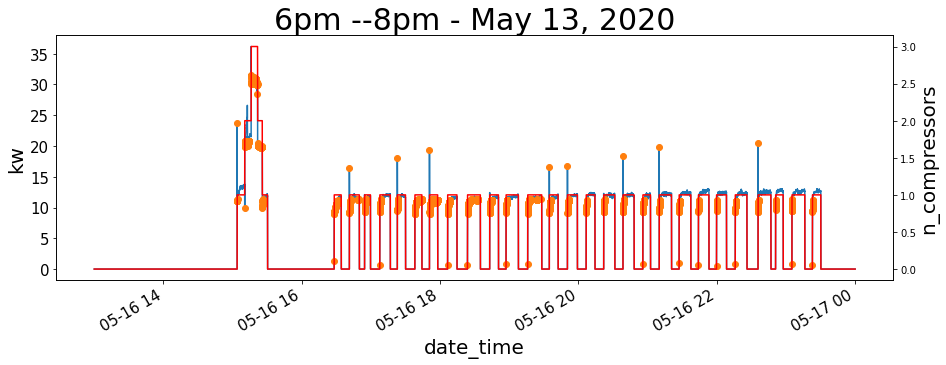

In [89]:
fig, ax = plt.subplots(figsize=(15,5))

date_time = (May.index.day==16) & (May.index.hour>12)

May[date_time].kw.plot(ax=ax)
May[outliers_May & date_time].kw.plot(style='o', ax=ax)

ax.set_xlabel('date_time', fontsize=20)
ax.set_ylabel('kw', fontsize=20)
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)
ax.set_title('6pm --8pm - May 13, 2020',fontsize=30)

axx = ax.twinx()
May[date_time].n_compressors.plot(ax=axx,c='r')
axx.set_ylabel('n_compressors', fontsize=20)
ax.tick_params(axis='y', labelsize=15)

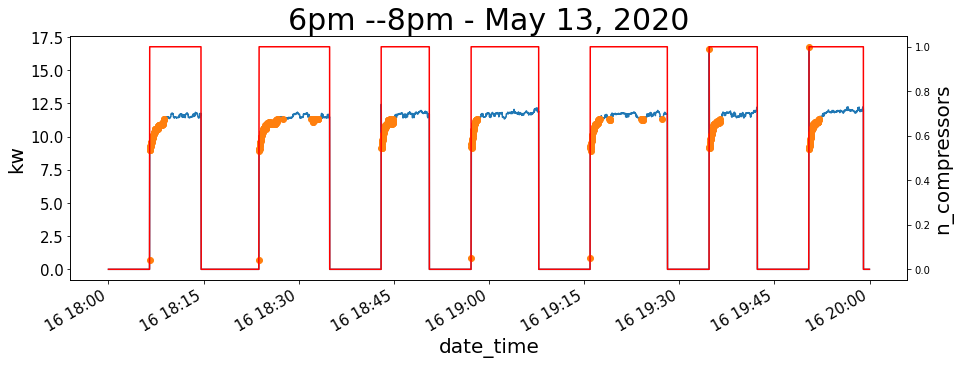

In [90]:
fig, ax = plt.subplots(figsize=(15,5))

date_time = (May.index.day==16) & (May.index.hour.isin([18,19]))

May[date_time].kw.plot(ax=ax)
May[outliers_May & date_time].kw.plot(style='o', ax=ax)

ax.set_xlabel('date_time', fontsize=20)
ax.set_ylabel('kw', fontsize=20)
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)
ax.set_title('6pm --8pm - May 13, 2020',fontsize=30)

axx = ax.twinx()
May[date_time].n_compressors.plot(ax=axx,c='r')
axx.set_ylabel('n_compressors', fontsize=20)
ax.tick_params(axis='y', labelsize=15)

From the point of view of the percentage of outliers (i.e., the percentage of kw entries in each day that are outliers), there is no big difference between October and May.

In [ ]:
fraction_May = 100*outliers_May.groupby(outliers_May.index.day).sum()/May.groupby(May.index.day).compressor1.sum()
fraction_Oct = 100*outliers_Oct.groupby(outliers_Oct.index.day).sum()/Oct.groupby(Oct.index.day).compressor1.sum()

# box plots
fig, ax = plt.subplots(2,1, sharex=True, figsize=(15,7))
sns.boxplot(fraction_Oct, ax=ax[0])
ax[0].tick_params(axis='x', labelsize=15)
ax[0].tick_params(axis='y', labelsize=15)
ax[0].set_title('Oct 2019',fontsize=20)


sns.boxplot(frac_May, ax=ax[1])
ax[1].set_xlabel('% of outliers', fontsize=20)
ax[1].tick_params(axis='x', labelsize=15)
ax[1].tick_params(axis='y', labelsize=15)
ax[1].set_title('May 2020',fontsize=20)